# Rf 2 0 1_Composite
Addition and convolution: composite p.d.f with signal and background component

pdf = f_bkg * bkg(x,a0,a1) + (1-fbkg) * (f_sig1 * sig1(x,m,s1 + (1-f_sig1) * sig2(x,m,s2)))




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:42 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Setup component pdfs
---------------------------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
their parameters

In [3]:
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

Build Chebychev polynomial p.d.f.

In [4]:
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = ROOT.RooRealVar("a1", "a1", -0.2, 0., 1.)
bkg = ROOT.RooChebychev("bkg", "Background", x, ROOT.RooArgList(a0, a1))

Method 1 - Two RooAddPdfs
------------------------------------------
Add signal components

Sum the signal components into a composite signal p.d.f.

In [5]:
sig1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = ROOT.RooAddPdf("sig", "Signal", ROOT.RooArgList(
    sig1, sig2), ROOT.RooArgList(sig1frac))

Add signal and background
------------------------------------------------

Sum the composite signal and background

In [6]:
bkgfrac = ROOT.RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "g1+g2+a", ROOT.RooArgList(bkg, sig), ROOT.RooArgList(bkgfrac))

Sample, fit and plot model
---------------------------------------------------

Generate a data sample of 1000 events in x from model

In [7]:
data = model.generate(ROOT.RooArgSet(x), 1000)

Fit model to data

In [8]:
model.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
     3 bkgfrac      5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     4 sig1frac     8.00000e-01  1.00000e

Plot data and PDF overlaid

In [9]:
xframe = x.frame(ROOT.RooFit.Title(
    "Example of composite pdf=(sig1+sig2)+bkg"))
data.plotOn(xframe)
model.plotOn(xframe)

<ROOT.RooPlot object ("frame_x_55acddf83f40") at 0x55acddf83f40>

Overlay the background component of model with a dashed line

In [10]:
ras_bkg = ROOT.RooArgSet(bkg)
model.plotOn(xframe, ROOT.RooFit.Components(ras_bkg),
             ROOT.RooFit.LineStyle(ROOT.kDashed))

<ROOT.RooPlot object ("frame_x_55acddf83f40") at 0x55acddf83f40>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Overlay the background+sig2 components of model with a dotted line

In [11]:
ras_bkg_sig2 = ROOT.RooArgSet(bkg, sig2)
model.plotOn(xframe, ROOT.RooFit.Components(ras_bkg_sig2),
             ROOT.RooFit.LineStyle(ROOT.kDotted))

<ROOT.RooPlot object ("frame_x_55acddf83f40") at 0x55acddf83f40>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)


Print structure of composite p.d.f.

In [12]:
model.Print("t")

0x55acddb74c80 RooAddPdf::model = 0.885987 [Auto,Dirty] 
  0x55acddb09500/V- RooChebychev::bkg = 0.733485 [Auto,Dirty] 
    0x55acdc8effc0/V- RooRealVar::x = 5
    0x55acdc0aea80/V- RooRealVar::a0 = 0.507642 +/- 0.0795738
    0x55acdc0713c0/V- RooRealVar::a1 = 0.266515 +/- 0.13378
  0x55acddaf97e0/V- RooRealVar::bkgfrac = 0.427793 +/- 0.0355511
  0x55acdc0b9aa0/V- RooAddPdf::sig = 1 [Auto,Dirty] 
    0x55acdda67ac0/V- RooGaussian::sig1 = 1 [Auto,Dirty] 
      0x55acdc8effc0/V- RooRealVar::x = 5
      0x55acdbd51110/V- RooRealVar::mean = 5
      0x55acdcd39670/V- RooRealVar::sigma1 = 0.5
    0x55acddafdf90/V- RooRealVar::sig1frac = 0.641234 +/- 0.0967457
    0x55acdca31db0/V- RooGaussian::sig2 = 1 [Auto,Dirty] 
      0x55acdc8effc0/V- RooRealVar::x = 5
      0x55acdbd51110/V- RooRealVar::mean = 5
      0x55acdc8ee670/V- RooRealVar::sigma2 = 1


Method 2 - One RooAddPdf with recursive fractions
---------------------------------------------------

Construct sum of models on one go using recursive fraction interpretations

  model2 = bkg + (sig1 + sig2)

In [13]:
model2 = ROOT.RooAddPdf(
    "model",
    "g1+g2+a",
    ROOT.RooArgList(
        bkg,
        sig1,
        sig2),
    ROOT.RooArgList(
        bkgfrac,
        sig1frac),
    ROOT.kTRUE)

NB: Each coefficient is interpreted as the fraction of the
left-hand component of the i-th recursive sum, i.e.

  sum4 = A + ( B + ( C + D)  with fraction fA, and fC expands to

  sum4 = fA*A + (1-fA)*(fB*B + (1-fB)*(fC*C + (1-fC)*D))

Plot recursive addition model
---------------------------------------------------------

In [14]:
model2.plotOn(xframe, ROOT.RooFit.LineColor(ROOT.kRed),
              ROOT.RooFit.LineStyle(ROOT.kDashed))
model2.plotOn(
    xframe,
    ROOT.RooFit.Components(ras_bkg_sig2),
    ROOT.RooFit.LineColor(
        ROOT.kRed),
    ROOT.RooFit.LineStyle(
        ROOT.kDashed))
model2.Print("t")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
0x55acde07dc00 RooAddPdf::model = 0.885987 [Auto,Dirty] 
  0x55acddb09500/V- RooChebychev::bkg = 0.733485 [Auto,Dirty] 
    0x55acdc8effc0/V- RooRealVar::x = 5
    0x55acdc0aea80/V- RooRealVar::a0 = 0.507642 +/- 0.0795738
    0x55acdc0713c0/V- RooRealVar::a1 = 0.266515 +/- 0.13378
  0x55acddaf97e0/V- RooRealVar::bkgfrac = 0.427793 +/- 0.0355511
  0x55acdda67ac0/V- RooGaussian::sig1 = 1 [Auto,Dirty] 
    0x55acdc8effc0/V- RooRealVar::x = 5
    0x55acdbd51110/V- RooRealVar::mean = 5
    0x55acdcd39670/V- RooRealVar::sigma1 = 0.5
  0x55acddfe16c0/V- RooRecursiveFraction::model_recursive_fraction_sig1 = 0.366918 [Auto,Clean] 
    0x55acddafdf90/V- RooRealVar::sig1frac = 0.641234 +/- 0.0967457
    0x55acddaf97e0/V- RooRealVar::bkgfrac = 0.427793 +/- 0.0355511
  0x55acdca31db0/V- RooGaussian::sig2 = 1 [Auto,Dirty] 
 

Draw the frame on the canvas

In [15]:
c = ROOT.TCanvas("rf201_composite", "rf201_composite", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()

c.SaveAs("rf201_composite.png")

Info in <TCanvas::Print>: png file rf201_composite.png has been created


Draw all canvases 

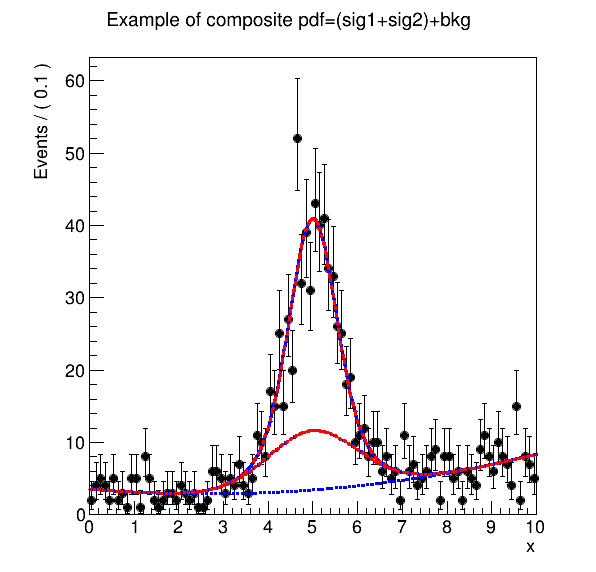

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()